# Loading Packages

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [213]:
df_all = pd.read_csv("all_projects.csv")

In [214]:
df_all = df_all.drop(columns=["project","init","end","project_url"])

In [215]:
X = df_all.drop(columns=["status"])
y = df_all["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [216]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [217]:
X_train.shape

(303, 25)

In [218]:
X_test.shape

(34, 25)

In [219]:
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [220]:
print("Accuracy on training set: {:.3f}".format(random_forest_classifier.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(random_forest_classifier.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.941


In [221]:
print("Feature importances:") 
print(random_forest_classifier.feature_importances_)

Feature importances:
[0.04735162 0.05168851 0.0348829  0.17616336 0.0271018  0.03707058
 0.03566939 0.0210897  0.00504753 0.02987988 0.09692178 0.04046598
 0.02939139 0.02206971 0.05378282 0.09920616 0.0298311  0.02565141
 0.03273589 0.01341864 0.01496381 0.02442204 0.02938248 0.02181151
 0.        ]


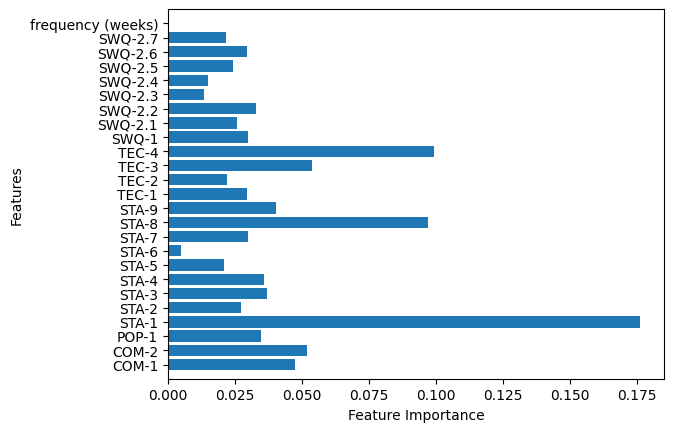

In [222]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns.tolist())
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances(random_forest_classifier)

In [223]:
from sklearn.metrics import confusion_matrix

In [224]:
pred_tree = random_forest_classifier.predict(X_test)

confusion = confusion_matrix(y_test, pred_tree)
print("counfusion matrix:\n", confusion)

counfusion matrix:
 [[30  0]
 [ 2  2]]


In [225]:
y_test.value_counts()

status
sustainable      30
unsustainable     4
Name: count, dtype: int64

In [226]:
from sklearn.metrics import ConfusionMatrixDisplay

<function matplotlib.pyplot.show(close=None, block=None)>

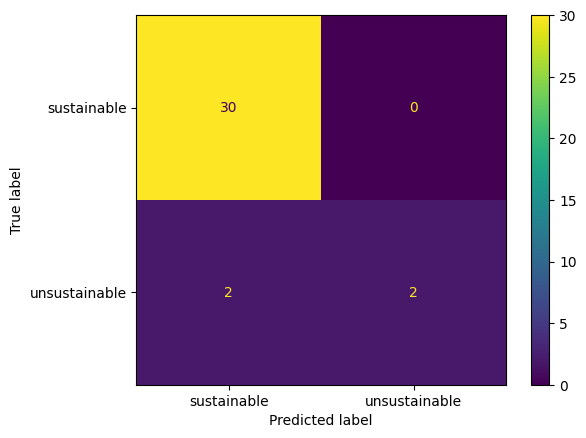

In [227]:
ConfusionMatrixDisplay.from_estimator(random_forest_classifier, X_test, y_test, display_labels=['sustainable', 'unsustainable'])
plt.show

In [228]:
y_probs = random_forest_classifier.predict_proba(X_test)[:, 1] 
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.90


ROC AUC Score: 0.90


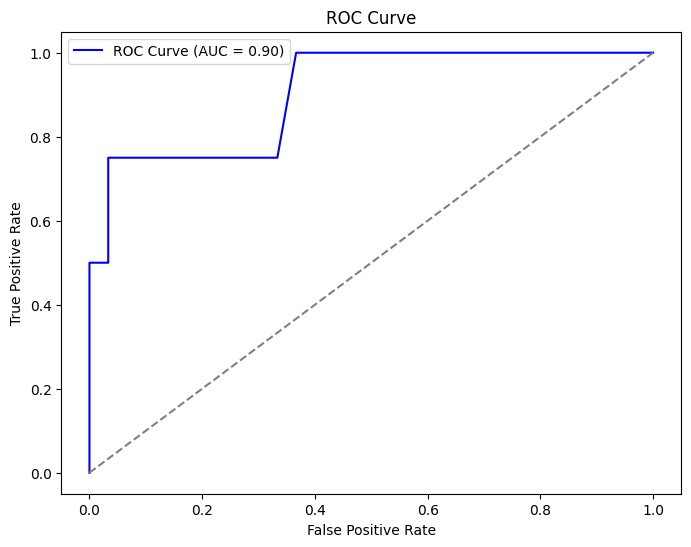

In [229]:
# Encode the target labels (assuming 'sustainable' = 1, 'unsustainable' = 0)
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Then, calculate the probabilities and the ROC curve
y_probs = random_forest_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test_encoded, y_probs)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_probs)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random model)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
